In [278]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv

### Wczytanie pliku i konwersja

In [287]:
def prepare_data(file_dir,lista):
    df = pd.read_csv(file_dir)
    #ista = [str,float,str,str,str,float,int,'date',bool]
    for column,types in zip(df,lista):
        try:
            if types == 'date':
                 df[column] = pd.to_datetime(df[column])
            else:
                df[column] = df[column].astype(types)
                print(type(df[column]))
        except ValueError:
            print(f'oj, coś się zjebało przy kolumnie {column}')
            df[column] = df[column].astype(str)
    return df
        

In [176]:
#df = pd.read_csv('///home/makbet/Pulpit/hahaha/cars2.csv', sep = ';')

In [108]:
#df2 = pd.read_csv('///home/makbet/Pulpit/hahaha/dataset_Facebook.csv', sep = ';')

### Konwersja danych

In [177]:
lista = [str,float,str,str,str,float,int,'date',bool]
for column,types in zip(df,lista):
        try:
            if types == 'date':
                 df[column] = pd.to_datetime(df[column])
            else:
                df[column] = df[column].astype(types)
                print(type(df[column]))
        except ValueError:
            print(f'oj, coś się zjebało przy kolumnie {column}')
            df[column] = df[column].astype(str)

<class 'pandas.core.series.Series'>
oj, coś się zjebało przy kolumnie marka
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## Histogram

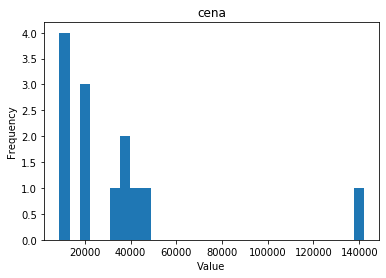

In [295]:
def histogram(x):
    fig = plt.hist(df[x],bins = 30)
    plt.title(x)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    return plt.savefig(x+'.png')
histogram('cena')

## Statystyki

### Dane liczbowe

In [288]:
df2.describe().loc[['min','mean','max','50%','std']] #Dane statystyczne

,Page total likes,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
min,81370.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
mean,123194.176000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
max,139441.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000
50%,129600.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
std,16272.813214,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118


'cena;float64;8900.0;35022.61538461538;142000.0;22000.0;34625.03471367324;adres histogramu'

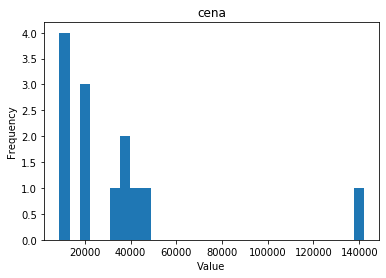

In [284]:
def get_nums(x):
    desc = df[x].describe().loc[['min','mean','max','50%','std']]
    types = df[x].dtypes
    histogram(x)
    return f'{x};{types};{desc[0]};{desc[1]};{desc[2]};{desc[3]};{desc[4]};{"adres histogramu"}'
get_nums('cena')

### Dane obiektowe

In [129]:
df['marka'].nunique() #liczba unikalnych wartości

4

In [289]:
df2['Type'].isnull().sum() #liczba nulli

0

'marka;object;10;0;adres histogramu'

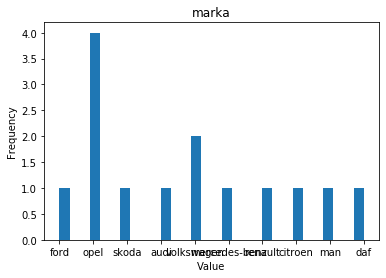

In [290]:
def get_object(x):
    nulls = df[x].isnull().sum()
    types = df[x].dtypes
    uniques = df[x].nunique()
    histogram(x)
    return f'{x};{types};{uniques};{nulls};{"adres histogramu"}'
get_object('marka')

### Dane kategorialne

In [291]:
df2['Category'].nunique()
df2['Category'].dtypes

CategoricalDtype(categories=[1.0, 2.0, 3.0], ordered=False)

In [293]:
def get_cat(x):
    uniques = df[x].nunique()
    types = df[x].dtypes
    histogram(x)
    return f'{x};{types};{uniques};{"adres histogramu"}'

### Dane bool

'Dane;bool;adres histogramu'

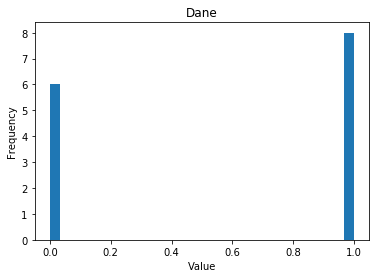

In [303]:
def get_bool(x):
    uniques = df[x].nunique()
    types = df[x].dtypes
    fig = plt.hist((df[x].astype(float)),bins = 30)
    plt.title(x)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.savefig(x+'.png')
    return f'{x};{types};{"adres histogramu"}'
get_bool('Dane')

### Dane date

In [282]:
def get_date(x):
    types = df[x].dtypes
    mini = df[x].min()
    maxi = df[x].max()
    return f'{x};{types};{mini};{maxi}'

### Załadowanie metadanych do bazy danych

### Zapisanie do pliku

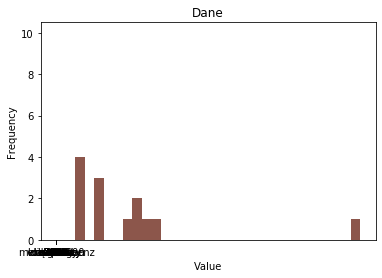

In [304]:
with open('podsumowanie.csv', 'w', newline='') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for column in df:
        if df[column].dtypes == 'object':
            datawriter.writerow([get_object(column)])
        elif df[column].dtypes == 'bool':
            datawriter.writerow([get_bool(column)])
        elif df[column].dtype.name == 'category':
            datawriter.writerow([get_category(column)])
        elif df[column].dtypes == 'float64' or df[column].dtypes == 'int64':
            datawriter.writerow([get_nums(column)])
        elif df[column].dtypes == 'datetime64[ns]':
            datawriter.writerow([get_date(column)])